## Samples

Image name: COCO_val2014_000000221291
We find 7 objects,
but actually there are 2 objects.


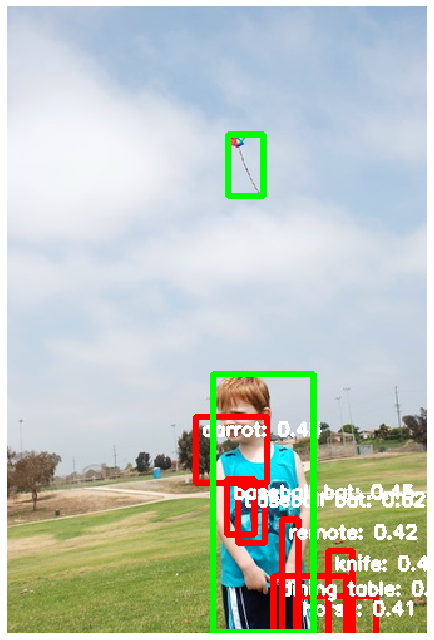

Image name: COCO_val2014_000000245764
We find 18 objects,
but actually there are 2 objects.


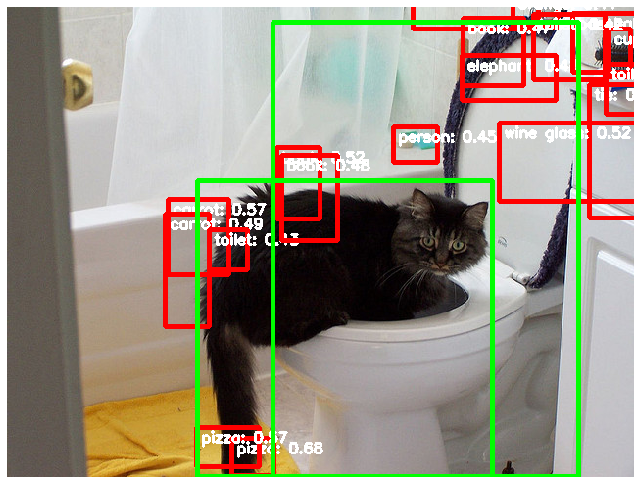

Image name: COCO_val2014_000000532481
We find 1 objects,
but actually there are 10 objects.


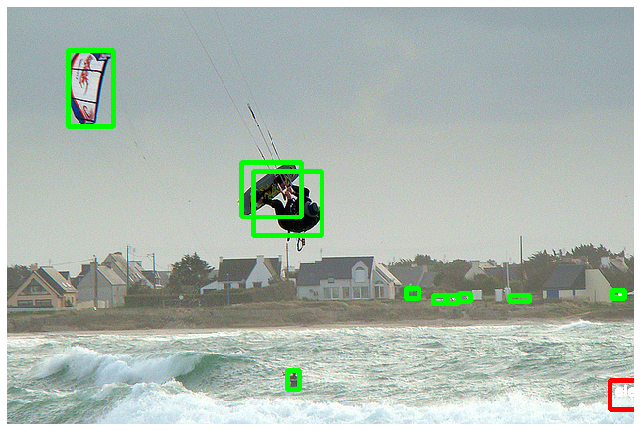

In [2]:
from ssd.vgg_ssd import create_vgg_ssd, create_vgg_ssd_predictor

import json
from collections import OrderedDict
import cv2
import random
import matplotlib.pyplot as plt
%matplotlib inline


def image_print(image_path):
    
    net_type = "vgg16-ssd"
    model_path = "models/vgg16-ssd-Epoch-1-Loss-24.3297.pth"
    label_path = "models/coco-model-labels.txt"
    data_dir = "/home/taeho/data/coco2014/"
    

    class_names = [name.strip() for name in open(label_path).readlines()]
    
    if net_type == 'vgg16-ssd':
        net = create_vgg_ssd(len(class_names), is_test=True)
        predictor = create_vgg_ssd_predictor(net, candidate_size=200)
    else:
        print("The net type is wrong.")
    
    net.load(model_path)


    #image_path = data_dir + "images/val2014/" + image_names_part[i] + ".jpg"
    print("Image name:", image_path[7:32])

    orig_image = cv2.imread(image_path)
    image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
    boxes, labels, probs = predictor.predict(image, 10, 0.4)
        
    for i in range(boxes.size(0)):
        box = boxes[i, :]
        cv2.rectangle(orig_image, (box[0], box[1]), (box[2], box[3]), (0, 0, 255), 4)
        label = str(class_names[labels[i]]) + ": " + str(probs[i])[-7:-3]

        cv2.putText(orig_image, label,
                    (box[0] + 5, box[1] + 15),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5,  # font scale
                    (255,255,255),
                    2)  # line type

        
    annotation_file = data_dir + "annotations/annotations/instances_val2014.json"
    with open(annotation_file, encoding="utf-8") as data_file:
        data = json.load(data_file, object_pairs_hook=OrderedDict)

    boxes = []
    image_number = int(image_path[20:32])
    
    for index, name in enumerate(data["images"]):
        if name["id"] == image_number:
            image_height = name["height"]
            image_width = name["width"]
    for index, name in enumerate(data["annotations"]):
        category_id = name["category_id"]
        bbox = name["bbox"]
        if name["image_id"] == image_number:
            for index, name in enumerate(data["categories"]):
                if name["id"] == category_id:

                    xmin = round(bbox[0])
                    if xmin == 0:
                        xmin += 1
                    ymin = round(bbox[1])
                    if ymin == 0:
                        ymin += 1
                    xmax = round(bbox[0] + bbox[2])
                    if xmax == image_width:
                        xmax -= 1
                    ymax = round(bbox[1] + bbox[3])
                    if ymax == image_height:
                        ymax -= 1

                    bbox = [xmin, ymin, xmax, ymax]
                    boxes.append(bbox)

    for i, num in enumerate(boxes):
        cv2.rectangle(orig_image, (boxes[i][0], boxes[i][1]), (boxes[i][2], boxes[i][3]), (0, 255, 0), 4)
            
    print(f"We find {len(probs)} objects,")
    print("but actually there are %d objects." %len(boxes))
        
    img = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(9,9))
    plt.axis('off')
    plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.imshow(img)
    plt.show()

    path = "run_ssd_example_output.jpg"
    ##cv2.imwrite(path, img)
    

image_print("./data/COCO_val2014_000000221291.jpg")
image_print("./data/COCO_val2014_000000245764.jpg")
image_print("./data/COCO_val2014_000000532481.jpg")